<a href="https://colab.research.google.com/github/gianna1490/master/blob/main/UNet_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Course:-Deep-Learning" data-toc-modified-id="Course:-Deep-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Course</strong>: Deep Learning</a></span></li><li><span><a href="#Assignment-06:-Transfer-learning-and-Fine-tuning" data-toc-modified-id="Assignment-06:-Transfer-learning-and-Fine-tuning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Assignment 06:</strong> Transfer learning and Fine tuning</a></span></li><li><span><a href="#PyTorch" data-toc-modified-id="PyTorch-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>PyTorch</strong></a></span></li><li><span><a href="#Load-packages" data-toc-modified-id="Load-packages-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Load packages</strong></a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Functions</strong></a></span></li><li><span><a href="#Base-models" data-toc-modified-id="Base-models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Base models</strong></a></span><ul class="toc-item"><li><span><a href="#VGG16-model-with-top-layers-(classification-layers)" data-toc-modified-id="VGG16-model-with-top-layers-(classification-layers)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><strong>VGG16</strong> model with top layers (classification layers)</a></span></li><li><span><a href="#VGG16-model-without-top-layers-(classification-layers):-feature-extractor,-and-its-original-input-shape." data-toc-modified-id="VGG16-model-without-top-layers-(classification-layers):-feature-extractor,-and-its-original-input-shape.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><strong>VGG16</strong> model without top layers (classification layers): feature extractor, and its original input shape.</a></span></li><li><span><a href="#VGG16-model-without-top-layers-(classification-layers):-feature-extractor,-and-a-different-input-shape." data-toc-modified-id="VGG16-model-without-top-layers-(classification-layers):-feature-extractor,-and-a-different-input-shape.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span><strong>VGG16</strong> model without top layers (classification layers): feature extractor, and a different input shape.</a></span></li></ul></li><li><span><a href="#Dataset-Preparation" data-toc-modified-id="Dataset-Preparation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dataset Preparation</a></span><ul class="toc-item"><li><span><a href="#Variables" data-toc-modified-id="Variables-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><strong>Variables</strong></a></span></li><li><span><a href="#Download-the-dataset" data-toc-modified-id="Download-the-dataset-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span><strong>Download the dataset</strong></a></span></li></ul></li><li><span><a href="#Model-Creation" data-toc-modified-id="Model-Creation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Creation</a></span><ul class="toc-item"><li><span><a href="#Callback-Definition" data-toc-modified-id="Callback-Definition-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Callback Definition</a></span></li></ul></li><li><span><a href="#Transfer-learning" data-toc-modified-id="Transfer-learning-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><strong>Transfer learning</strong></a></span></li><li><span><a href="#Fine-tuning" data-toc-modified-id="Fine-tuning-10"><span class="toc-item-num">10&nbsp;&nbsp;</span><strong>Fine tuning</strong></a></span></li></ul></div>

## **Course**: Deep Learning

[<img align="right" width="400" height="100" src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg">](https://www.tu-braunschweig.de/en/)

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) \([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de)) and [Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz) (p.diaz@tu-bs.de)

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)

In [ ]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## **Assignment 06:** Transfer learning and Fine tuning

In this assignment you will explore the differences between transfer learning and fine tuning.

For this, you will use the **VGG16** pre-trained network with **ImageNet** dataset.

<center>
<img width=600 src="https://miro.medium.com/max/1400/1*NNifzsJ7tD2kAfBXt3AzEg.png" img>

</center>

- **Transfer learning:**
  1. Take a pre-trained model as $base\_model$
  2. Freeze the $base\_model$
  3. Add a $head$ (classification layers) to the $base\_model$
  4. Train the new model
  5. $trainable\_parameters = head\_parameters $

- **Fine tuning:**
  1. Take a pre-trained model as $base\_model$
  2. Freeze some layers of the $base\_model$
  3. Add a $head$ (classification layers) to the $base\_model$
  4. Train the new model
  5. $trainable\_parameters = head\_parameters + base\_model\_parameters $

## **PyTorch**

For PyTorch, you can visit the following links:
- [VGG16 PyTorch documentation](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html)
- [Transfer learning with PyTorch](https://debuggercafe.com/transfer-learning-with-pytorch/)
- [Freeze layers of PyTorch model](https://medium.com/@shuklaatul032/freeze-layers-of-pytorch-model-48d2725223b3)


## **Load packages**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model

from tensorflow.keras.layers import (
    Dense,
    Input,
    GlobalAveragePooling2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Callbacks
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    TensorBoard,
    LearningRateScheduler,
    ReduceLROnPlateau,
)
from tensorflow.keras.regularizers import l2

from tensorflow.keras.initializers import GlorotUniform

import numpy as np
import os
import random

# External files with functions to load the dataset,
from importlib import reload
import datasets
import data_generator

# to plot each epoch of the training
!pip install livelossplot
from livelossplot.inputs.keras import PlotLossesCallback


# Useful to reload modified external files without need
# of restarting the kernel. Just run again this cell.
reload(datasets)
reload(data_generator)

from datasets import *
from data_generator import *

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


<IPython.core.display.Javascript object>

In [ ]:
os.environ["PYTHONHASHSEED"] = str(42)


def reset_seeds():
    os.environ["PYTHONHASHSEED"] = str(42)
    tf.random.set_seed(42)
    np.random.seed(42)
    random.seed(42)

<IPython.core.display.Javascript object>

## **Functions**

In [ ]:
def freeze_up_to(model, freeze_layer_name):
    """Function to freeze some layers of the model

    Args:
        model (keras.Model): a keras.Model
        freeze_layer_name (str): layer name of "model". All layers up
          to this layer will be freezed.

    Returns:
        keras.Model: a keras.Model with some layers freezed.
    """
    # Getting layer number based on layer name
    for id_layer, layer in enumerate(model.layers):
        if layer.name == freeze_layer_name:
            layer_number = id_layer
            break

    # Froze layers
    for layer in model.layers[:layer_number]:
        layer.trainable = False

    return model

<IPython.core.display.Javascript object>

## **Base models**

### **VGG16** model with top layers (classification layers)

In [ ]:
vgg16_full = VGG16(include_top=True, weights="imagenet", input_shape=(224, 224, 3))

vgg16_full.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<IPython.core.display.Javascript object>

### **VGG16** model without top layers (classification layers): feature extractor, and its original input shape.

In [ ]:
vgg16_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<IPython.core.display.Javascript object>

### **VGG16** model without top layers (classification layers): feature extractor, and a different input shape.

In [ ]:
vgg16_dif_input = VGG16(
    include_top=False, weights="imagenet", input_shape=(160, 160, 3)
)

vgg16_dif_input.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

<IPython.core.display.Javascript object>

## Dataset Preparation

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<IPython.core.display.Javascript object>

First, we will import the Eurosat dataset from Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# #drive.mount("/content/drive", force_remount=True)

<IPython.core.display.Javascript object>

In [ ]:
# %cd drive/My Drive/Colab Notebooks/DeepLearning_course/Lab_03/Assignment_05/

<IPython.core.display.Javascript object>

### **Variables**

In [ ]:
PROJECT_DIR = "."  # os.getcwd()
SEED = 42
BATCH_SIZE = 32
TARGET_SIZE = 64

<IPython.core.display.Javascript object>

### **Download the dataset**

We will use the [EuroSAT dataset](https://zenodo.org/record/7711810#.ZFn-y3bP1D9) with Sentinel-2 images. There are two versions of this dataset: RGB (3 bands) and MS (multispectral - 13 bands).

For this assignment, we will work with the RGB version. The following lines download the dataset (~130 MB):

In [ ]:
url_dataset = "https://zenodo.org/record/7711810/files/EuroSAT_RGB.zip?download=1"
filename = "EuroSAT_RGB.zip"

if not os.path.exists("EuroSAT_RGB"):
    !pip install wget
    import wget

    f = wget.download(url_dataset, PROJECT_DIR)
    import zipfile

    with zipfile.ZipFile(filename, "r") as zip_ref:
        zip_ref.extractall(".")
    os.remove(join(PROJECT_DIR, filename))

<IPython.core.display.Javascript object>

First of all, we will declare a customed data generator for the Eurosat dataset

In [ ]:
path_data = join(PROJECT_DIR, "EuroSAT_RGB")

df, n_classes = read_eurosat(path_data=path_data, SEED=SEED)
classes = np.unique(df["class_str"].values)

df

,path_image,class_str,class_int
0,.\EuroSAT_RGB\Forest\Forest_2313.jpg,Forest,1
1,.\EuroSAT_RGB\PermanentCrop\PermanentCrop_2358...,PermanentCrop,6
2,.\EuroSAT_RGB\HerbaceousVegetation\HerbaceousV...,HerbaceousVegetation,2
3,.\EuroSAT_RGB\Pasture\Pasture_1415.jpg,Pasture,5
4,.\EuroSAT_RGB\Highway\Highway_1611.jpg,Highway,3
...,...,...,...
26995,.\EuroSAT_RGB\River\River_76.jpg,River,8
26996,.\EuroSAT_RGB\Forest\Forest_2391.jpg,Forest,1
26997,.\EuroSAT_RGB\AnnualCrop\AnnualCrop_861.jpg,AnnualCrop,0
26998,.\EuroSAT_RGB\Pasture\Pasture_1796.jpg,Pasture,5


<IPython.core.display.Javascript object>

In [ ]:
splits = train_val_test_split(df, val_size=0.2, test_size=0.2, SEED=SEED)

x_train = splits["x_train"]
y_train = splits["y_train"]
x_val = splits["x_val"]
y_val = splits["y_val"]
x_test = splits["x_test"]
y_test = splits["y_test"]

<IPython.core.display.Javascript object>

In [ ]:
# Number of samples per class
_, counts_train = np.unique(y_train, return_counts=True)
_, counts_val = np.unique(y_val, return_counts=True)
_, counts_test = np.unique(y_test, return_counts=True)

print("Samples per class - train: {}".format(counts_train))
print("Samples per class - val: {}".format(counts_val))
print("Samples per class - test: {}".format(counts_test))

Samples per class - train: [1800 1800 1800 1500 1500 1200 1500 1800 1500 1800]
Samples per class - val: [600 600 600 500 500 400 500 600 500 600]
Samples per class - test: [600 600 600 500 500 400 500 600 500 600]


<IPython.core.display.Javascript object>

In [ ]:
data_gen_train = DataGenerator(
    path_images=x_train,
    labels=y_train,
    batch_size=BATCH_SIZE,
    n_classes=n_classes,
    target_size=TARGET_SIZE,
    shuffle=True,
)

data_gen_val = DataGenerator(
    path_images=x_val,
    labels=y_val,
    batch_size=BATCH_SIZE,
    n_classes=n_classes,
    target_size=TARGET_SIZE,
    shuffle=False,
)




<IPython.core.display.Javascript object>

## Model Creation

### Callback Definition

In [ ]:
cb_autosave_tl = ModelCheckpoint(
    "VGG_Model_tl.h5",
    mode="max",
    save_best_only=True,
    monitor="val_accuracy",
    verbose=1,
)

cb_autosave_ft = ModelCheckpoint(
    "VGG_Model_ft.h5",
    mode="max",
    save_best_only=True,
    monitor="val_accuracy",
    verbose=1,
)

patience=20
plot_loss_1 = PlotLossesCallback()

cb_early_stop = EarlyStopping(
    patience=patience, verbose=1, mode="auto", monitor="val_loss"
)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_lr=1e-6)


logdir_tl = join(PROJECT_DIR, "logs_tl")
cb_tensorboard_tl = TensorBoard(logdir_tl, histogram_freq=1)

logdir_ft = join(PROJECT_DIR, "logs_ft")
cb_tensorboard_ft = TensorBoard(logdir_ft, histogram_freq=1)



<IPython.core.display.Javascript object>

This model will perform feature extraction using the frozen pre-trained layers

## **Transfer learning**

In [ ]:
n_classes = 10  # For EuroSAT

<IPython.core.display.Javascript object>

**1.** Take a pre-trained model as $base\_model$


In [ ]:
vgg16_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

<IPython.core.display.Javascript object>

In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<IPython.core.display.Javascript object>

 **2.** Freeze the $base\_model$


In [ ]:
vgg16_base.trainable = False

<IPython.core.display.Javascript object>

In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<IPython.core.display.Javascript object>

 **3.** Add a $head$ (classification layers) to the $base\_model$


In [ ]:
input = Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = vgg16_base(x)
# x = tf.keras.layers.Flatten()(x)
x = GlobalAveragePooling2D()(x)
x = Dense(
    256,
    activation="relu",
    kernel_initializer=GlorotUniform(),
    kernel_regularizer=l2(0.01),
)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(
    128,
    activation="relu",
    kernel_initializer=GlorotUniform(),
    kernel_regularizer=l2(0.01),
)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(
    64,
    activation="relu",
    kernel_initializer=GlorotUniform(),
    kernel_regularizer=l2(0.01),
)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output = Dense(n_classes, activation="softmax")(x)

model = Model(input, output)

<IPython.core.display.Javascript object>

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328

<IPython.core.display.Javascript object>

**4.** Train the new model: `model.fit(...)`

In [ ]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])


<IPython.core.display.Javascript object>

In [ ]:
# Define the learning rate scheduler
def learning_rate_scheduler(epoch):
    initial_lr = 0.001
    decay_factor = 0.1
    decay_epochs = 10
    lr = initial_lr * decay_factor ** (epoch // decay_epochs)
    return lr


lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

<IPython.core.display.Javascript object>

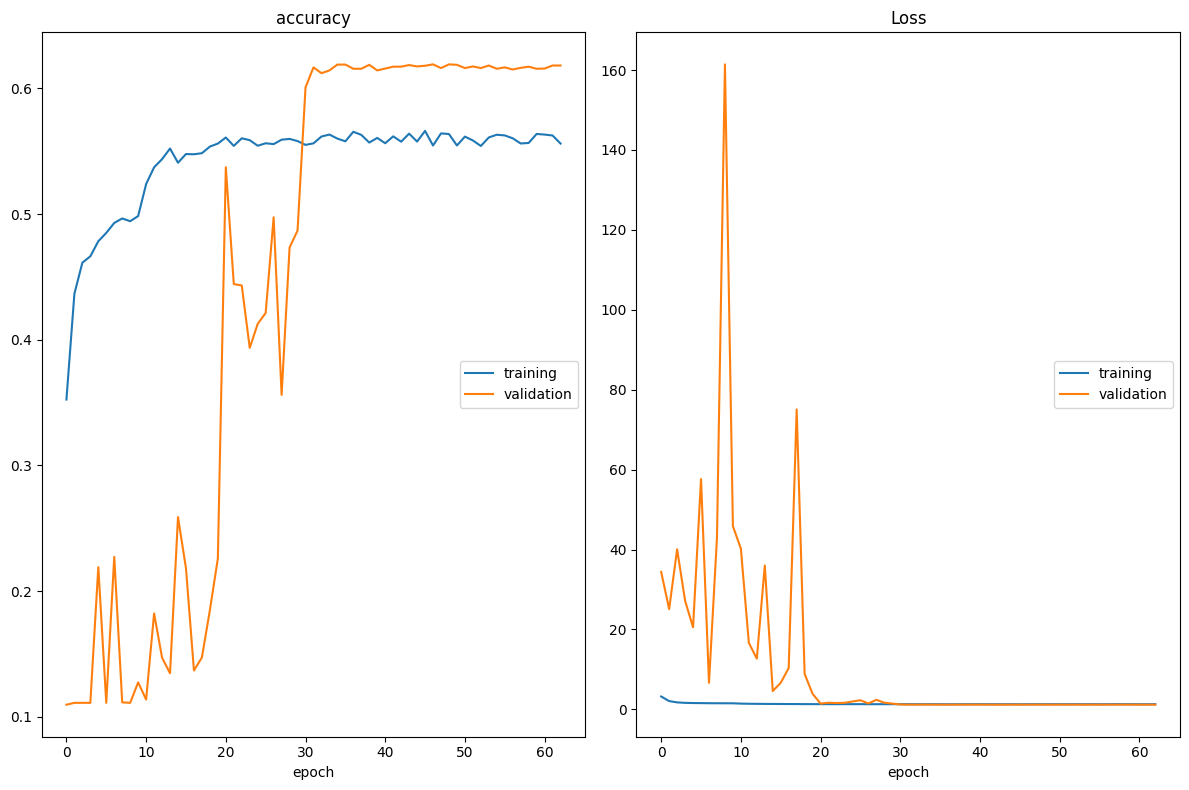

accuracy
	training         	 (min:    0.352, max:    0.566, cur:    0.556)
	validation       	 (min:    0.110, max:    0.619, cur:    0.618)
Loss
	training         	 (min:    1.281, max:    3.222, cur:    1.296)
	validation       	 (min:    1.168, max:  161.415, cur:    1.169)
507/507 [==============================] - 15s 29ms/step - loss: 1.2959 - accuracy: 0.5560 - val_loss: 1.1687 - val_accuracy: 0.6181 - lr: 1.0000e-09
Epoch 63: early stopping


<IPython.core.display.Javascript object>

In [ ]:
history_tl = model.fit(
    data_gen_train,
    validation_data=data_gen_val,
    epochs=200,
    callbacks=[
        cb_autosave_tl,
        cb_early_stop,
        cb_tensorboard_tl,
        plot_loss_1,
        lr_scheduler,
        reduce_lr,
    ],
)

**5.** $trainable\_parameters = head\_parameters $

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328

<IPython.core.display.Javascript object>

In [ ]:
!tensorboard dev upload --logdir logs_tl --name "Transfer Learning using EuroSAT dataset" --one_shot


In [ ]:
data_gen_test = DataGenerator(
    path_images=x_test,
    labels=y_test,
    batch_size=BATCH_SIZE,
    n_classes=n_classes,
    target_size=TARGET_SIZE,
    shuffle=False,
)


<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("VGG_Model_tl.h5")
print("Best model loaded from 'VGG_Model_tl.h5'")

# Evaluate on the training set
print("Train:")
scores_train = best_model.evaluate(data_gen_train)
print("Validation:")
scores_val = best_model.evaluate(data_gen_val)
print("Test:")
scores_test = best_model.evaluate(data_gen_test)

Best model loaded from 'VGG_Model_tl.h5'
Train:
507/507 [==============================] - 8s 16ms/step - loss: 1.1476 - accuracy: 0.6215
Validation:
169/169 [==============================] - 3s 17ms/step - loss: 1.1706 - accuracy: 0.6191
Test:
169/169 [==============================] - 57s 340ms/step - loss: 1.1660 - accuracy: 0.6207


<IPython.core.display.Javascript object>

In [ ]:
from tabulate import tabulate


# Create a table with the evaluation results
table_data = [
    ["Train", *scores_train],
    ["Validation", *scores_val],
    ["Test", *scores_test]
]

table_headers = ["Set", "Loss", "Accuracy"]

# Print the table
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))


+------------+---------+------------+
| Set        |    Loss |   Accuracy |
+============+=========+============+
| Train      | 1.14765 |   0.621481 |
+------------+---------+------------+
| Validation | 1.17064 |   0.619074 |
+------------+---------+------------+
| Test       | 1.16603 |   0.620741 |
+------------+---------+------------+


<IPython.core.display.Javascript object>

## **Fine tuning**

  **1.** Take a pre-trained model as $base\_model$


In [ ]:
vgg16_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

<IPython.core.display.Javascript object>

**2.** Freeze some layers of the $base\_model$


In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<IPython.core.display.Javascript object>

In [ ]:
vgg16_base = freeze_up_to(vgg16_base, "block5_conv2")
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<IPython.core.display.Javascript object>

**3.** Add a $head$ (classification layers) to the $base\_model$


In [ ]:
input = Input(shape=(224, 224, 3))
x = preprocess_input(input)
x = vgg16_base(x)
x = GlobalAveragePooling2D()(x)
x = Dense(
    256,
    activation="relu",
    kernel_initializer=GlorotUniform(),
    kernel_regularizer=l2(0.01),
)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(
    128,
    activation="relu",
    kernel_initializer=GlorotUniform(),
    kernel_regularizer=l2(0.01),
)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(
    64,
    activation="relu",
    kernel_initializer=GlorotUniform(),
    kernel_regularizer=l2(0.01),
)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

output = Dense(n_classes, activation="softmax")(x)

model_fn = Model(input, output)

<IPython.core.display.Javascript object>

In [ ]:
model_fn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                           

<IPython.core.display.Javascript object>

**4.** Train the new model: `model.fit(...)`


In [ ]:
model_fn.compile(
    optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

<IPython.core.display.Javascript object>

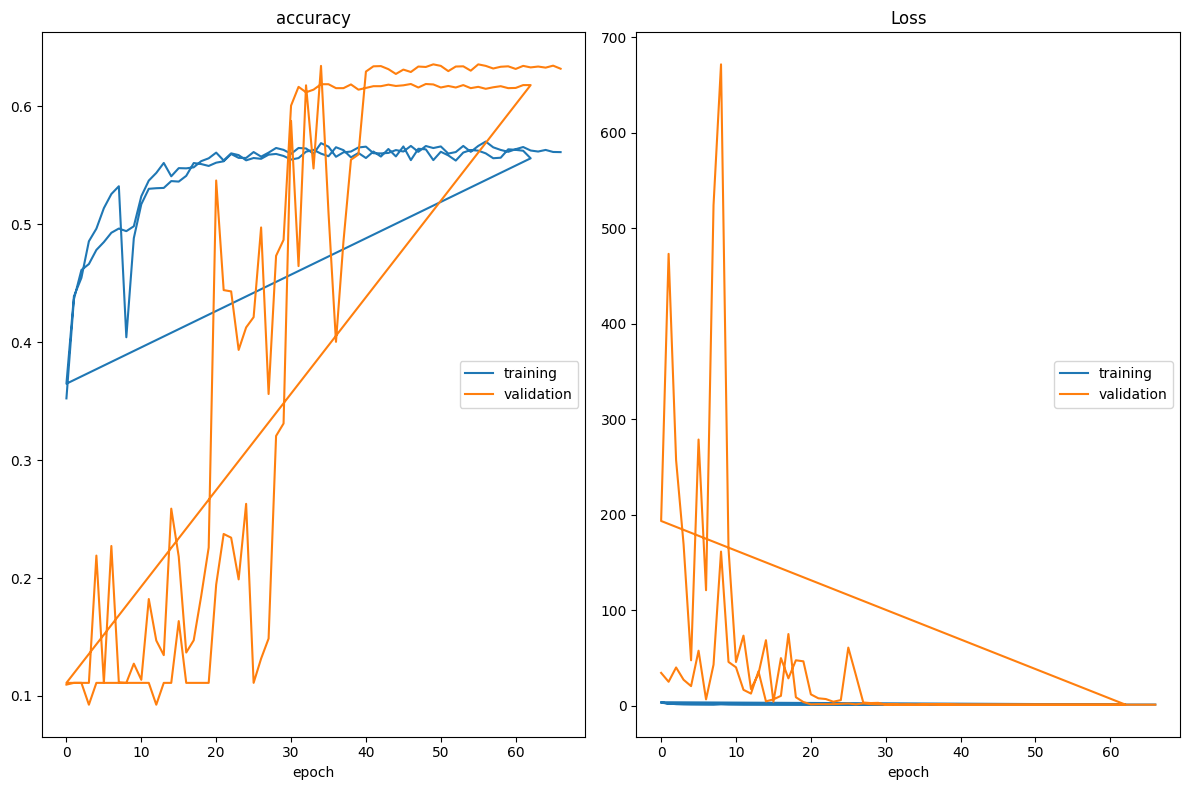

accuracy
	training         	 (min:    0.352, max:    0.570, cur:    0.561)
	validation       	 (min:    0.093, max:    0.636, cur:    0.632)
Loss
	training         	 (min:    1.209, max:    3.649, cur:    1.222)
	validation       	 (min:    1.069, max:  671.600, cur:    1.073)
507/507 [==============================] - 16s 31ms/step - loss: 1.2216 - accuracy: 0.5613 - val_loss: 1.0728 - val_accuracy: 0.6320 - lr: 1.0000e-09
Epoch 67: early stopping


<IPython.core.display.Javascript object>

In [ ]:
history_fn = model_fn.fit(
    data_gen_train,
    validation_data=data_gen_val,
    epochs=200,
    callbacks=[
        cb_autosave_ft,
        cb_early_stop,
        cb_tensorboard_ft,
        plot_loss_1,
        lr_scheduler,
        reduce_lr,
    ],
)

In [ ]:
!tensorboard dev upload --logdir logs_ft --name "Fine tuning using EuroSAT dataset" --one_shot


In [ ]:
# Load the best model
best_model_ft = load_model("VGG_Model_ft.h5")
print("Best model loaded from 'VGG_Model_ft.h5'")

# Evaluate on the training set
print("Train:")
scores_train_ft = best_model_ft.evaluate(data_gen_train)
print("Validation:")
scores_val_ft = best_model_ft.evaluate(data_gen_val)
print("Test:")
scores_test_ft = best_model_ft.evaluate(data_gen_test)

Best model loaded from 'VGG_Model_ft.h5'
Train:
507/507 [==============================] - 8s 16ms/step - loss: 1.0601 - accuracy: 0.6385
Validation:
169/169 [==============================] - 3s 16ms/step - loss: 1.0721 - accuracy: 0.6357
Test:
169/169 [==============================] - 3s 17ms/step - loss: 1.0663 - accuracy: 0.6387


<IPython.core.display.Javascript object>

In [ ]:
# Create a table with the evaluation results
table_data_ft = [
    ["Train", *scores_train_ft],
    ["Validation", *scores_val_ft],
    ["Test", *scores_test_ft],
]

table_headers = ["Set", "Loss", "Accuracy"]

# Print the table
print(tabulate(table_data_ft, headers=table_headers, tablefmt="grid"))

+------------+---------+------------+
| Set        |    Loss |   Accuracy |
+============+=========+============+
| Train      | 1.06007 |   0.638457 |
+------------+---------+------------+
| Validation | 1.07213 |   0.635741 |
+------------+---------+------------+
| Test       | 1.06633 |   0.638704 |
+------------+---------+------------+


<IPython.core.display.Javascript object>

  **5.** $trainable\_parameters = head\_parameters + base\_model\_parameters $